## Exercici Rectes Regressió. Les temperatures han pujat a Barcelona degut al canvi climàtic ?

En aquest [blog han verificat, creant un gràfic amb una recta de regressió, que les temperatures a Londres han pujat força](https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f); mitjançant Pandas i Matplotlib i un fitxer CSV extret d'un portal oficial d'Opendata.

Podeu provar [el codi font en el fitxer exemple-templondres.py](./exemple-templondres.py)

L'exercici consisteix en que creeu una recta de regressió similar usant una altra font de dades. Us proposem el de [les temperatures, de l'Ajuntament de Barcelona](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/temperatures-hist-bcn), actualitzada al 2021.

[CSV temperatures Barcelona, act. 2021](./temperaturesbarcelonadesde1780.csv)

<em>Observacions: Aquestes mostres segurament s'han tret de l'observatori Fabra i Puig, que té un clima més suau. Per consultar la info de qualsevol estació metereològica cal anar a la web oficial [portal transparència meteo.cat](https://analisi.transparenciacatalunya.cat/Medi-Ambient/Dades-meteorol-giques-de-la-XEMA/nzvn-apee) i fer un tractament previ que és molt entretingut.
</em>



In [100]:
## Importem llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Llegim el CSV i el posem en un Pandas Dataframe.
weatherBcn = pd.read_csv('./temperaturesbarcelonadesde1780.csv')
# print(weatherBcn)

## Volem fer l'estudi dels últims 15 anys només.
weatherBcnXXI = weatherBcn.tail(15)
print(weatherBcnXXI)


      Any  Temp_Mitjana_Gener  Temp_Mitjana_Febrer  Temp_Mitjana_Marc  \
227  2007                 9.9                 11.4               12.1   
228  2008                10.1                 10.2               10.8   
229  2009                 7.2                  8.7               11.2   
230  2010                 6.6                  8.0                9.6   
231  2011                 8.4                 10.0               10.9   
232  2012                 9.4                  6.8               13.4   
233  2013                 9.1                  7.7               11.2   
234  2014                 9.8                 10.1               12.3   
235  2015                 9.1                  8.2               12.0   
236  2016                10.7                 11.3               11.1   
237  2017                 7.9                 11.4               13.3   
238  2018                10.5                  6.7               10.8   
239  2019                 8.1                 11.9 

In [124]:
#Cada columna presenta la Temp_Mitjana. 

#Per a l'estudi, seleccionarem les del juny.
#Fixem-nos com podem seleccionar fàcilment les columnes per la etiqueta de la capçalera.
weatherBcnXXIJune = weatherBcnXXI[['Any','Temp_Mitjana_Juny']]
weatherBcnXXIJuly = weatherBcnXXI[['Any','Temp_Mitjana_Juliol']]
weatherBcnXXIAugust = weatherBcnXXI[['Any','Temp_Mitjana_Agost']]

## Opcional, afegir manualment la temperatura del juiol del 2022.
## insert-> per a columnes, append-> per a files.
## https://datagy.io/pandas-add-row/
## https://www.ccma.cat/el-temps/barcelona-registra-el-segon-juliol-mes-caloros-des-de-1914/noticia/3178369/

# Mètode correcte, però obsolet.
#weatherBcnXXIJuly = weatherBcnXXIJuly.append({'Any':'2022', 'Temp_Mitjana_Juliol':26.8}, ignore_index=True)

print(weatherBcnXXIJuly)

     Any  Temp_Mitjana_Juliol
0   2007                 23.6
1   2008                 23.8
2   2009                 24.4
3   2010                 25.7
4   2011                 21.2
5   2012                 23.2
6   2013                 25.6
7   2014                 22.6
8   2015                 26.0
9   2016                 24.9
10  2017                 24.2
11  2018                 25.3
12  2019                 25.4
13  2020                 25.0
14  2021                 24.8
15  2022                 26.8


C:\Users\39899124N\AppData\Local\Temp\ipykernel_2980\851818543.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weatherBcnXXIJuly = weatherBcnXXIJuly.append({'Any':'2022', 'Temp_Mitjana_Juliol':26.8}, ignore_index=True)


<AxesSubplot:xlabel='Any'>

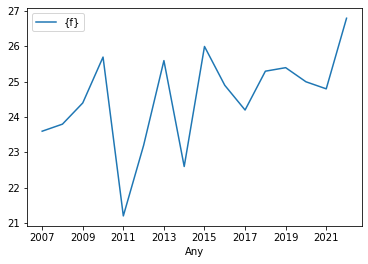

In [125]:
#Ara, creem el gràfic bàsic. 
weatherBcnXXIJuly.plot(y='Temp_Mitjana_Juliol',x='Any',label = "{f}")

### Càlcul de la recta de regressió.

La necessitem saber per a preveure la tendència de creixement de les temperatures.
En aquest cas, la regressió lineal encaixa bastant. 

En altres distribucions de dades encaixen les polinòmiques.

Recursos auxiliars:
* [Què és i com es calcula una recta de regressió](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/regression-line-example)
* [Dibuixar recta regressió amb Libre Office Calc](https://www.youtube.com/watch?v=nmka5nxV4AY)


In [126]:
#Ara, calculem la recta de regressió lineal.

g = np.polyfit(weatherBcnXXIJuly['Any'],weatherBcnXXIJuly['Temp_Mitjana_Juliol'],1)
#poly1d -> reg.lineal
f = np.poly1d(g)

#Afegirem una columna que ens ajuda a calcular la regressió lineal.
weatherBcnXXIJuly.insert(2,'Treg',f(weatherBcnXXIJuly['Any']))

TypeError: can only concatenate str (not "float") to str

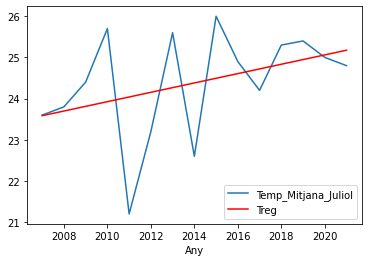

In [120]:
ax = weatherBcnXXIJuly.plot(x = 'Any',y='Temp_Mitjana_Juliol')
weatherBcnXXIJuly.plot(x='Any', y='Treg',color='Red',ax=ax)
plt.show()

### Anàlisi resultats.

Com podem veure, té un pendent considerable. La temperatura, en un observatori poc construït, ha pujat 1 grau i unes dècimes en 15 anys.

I si comptessim els resultats d'aquest estiu 2022, encara seria més alt el pendent de la recta.

